Imported All Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV file using pandas and Printing of Head of the dataset

In [2]:
train = pd.read_csv('adult-training.csv')
test = pd.read_csv('adult-test.csv', skiprows=1)

print(train.head())

   Age          Workclass  fnlgwt   Education  Education num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        Marital Status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital Gain  Capital Loss  Hours/Week  Native country  Income  
0          2174             0          40   United-States   <=50K  
1   

We have some ? in our dataset so Replacing that by NAN value and finding and summing of all null values in dataset.

In [3]:
train.replace(' ?', np.nan, inplace=True)
test.replace(' ?', np.nan, inplace=True)

print(train.isnull().sum())

Age                  0
Workclass         1836
fnlgwt               0
Education            0
Education num        0
Marital Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours/Week           0
Native country     583
Income               0
dtype: int64


In [4]:
print(test.isnull().sum())

Age                 0
Workclass         963
fnlgwt              0
Education           0
Education num       0
Marital Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Capital Gain        0
Capital Loss        0
Hours/Week          0
Native country    274
Income              0
dtype: int64


Feature Engineering

Selecting Income as a Taget Value.
Converting >50K as 1 and <=50 by 0.

In [5]:
train['Income'] = train['Income'].apply(lambda x: 1 if x==' >50K' else 0)
test['Income'] = test['Income'].apply(lambda x: 0 if x==' >50K' else 0)

Filling Not Applicable Values by 0 in Workclass column and printing the head of train data.

In [6]:
train['Workclass'].fillna(' 0', inplace=True)
test['Workclass'].fillna(' 0', inplace=True)
print(train.head(20))

    Age          Workclass  fnlgwt      Education  Education num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acd

Plotting the Features with Target Value Using catplot as Barchart. 

Plotting Workclass feature column with Target value that is Income.

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


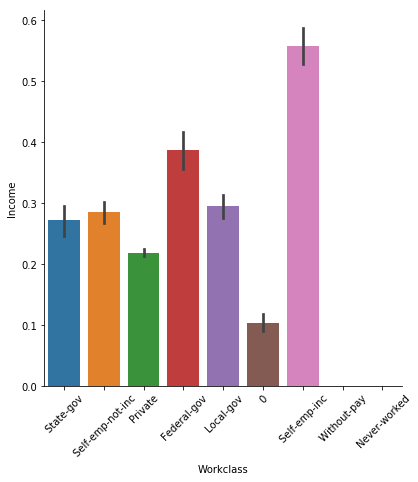

In [7]:
sns.catplot(x='Workclass', y='Income', data=train, kind='bar', height=6)
plt.xticks(rotation=45);
plt.show()

Counting Values in Workclass Column

In [8]:
train['Workclass'].value_counts()
test['Workclass'].value_counts()

 Private             11210
 Self-emp-not-inc     1321
 Local-gov            1043
 0                     963
 State-gov             683
 Self-emp-inc          579
 Federal-gov           472
 Without-pay             7
 Never-worked            3
Name: Workclass, dtype: int64

As we can see in above Never-worked and Without-pay are indicating single purpose
Merge without-pay and Never-worked.

In [9]:
train['Workclass'].replace(' Without-pay', 'Never-worked', inplace=True)
test['Workclass'].replace(' Without-pay', 'Never-worked', inplace=True)

Describing the fnlgwt column

In [10]:
train['fnlgwt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64

As we can see above that fnlght column has high mean and standard deviation. so we are applying logarithm for reducing mean and standard deviation.

In [11]:
train['fnlgwt'] = train['fnlgwt'].apply(lambda x: np.log1p(x))
test['fnlgwt'] = test['fnlgwt'].apply(lambda x: np.log1p(x))

print(train['fnlgwt'].describe())

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlgwt, dtype: float64


Plotting Education column with Target Value Income

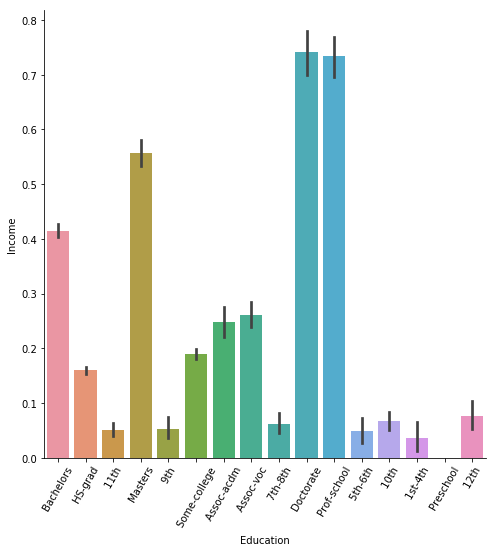

In [12]:
sns.catplot(x='Education', y='Income', data=train, kind='bar', height=7)
plt.xticks(rotation=60)
plt.show()

There are too many categories are available so we are combining some of categories in single category as primary.

In [13]:
def primary(x):
    if x in ['1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'Primary'
    else:
        return x


train['Education'] = train['Education'].apply(primary)
test['Education'] = test['Education'].apply(primary)

Re plotting the Eduction, Income chart after above changes. 

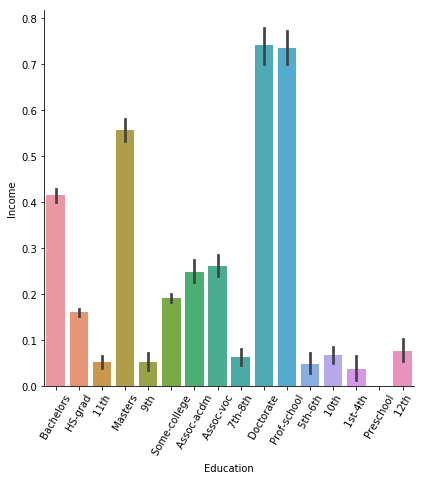

In [14]:
sns.catplot(x='Education', y='Income', data=train, height=6, kind='bar')
plt.xticks(rotation=60)
plt.show()

Plotting Marital Status columns with Target Column Income.

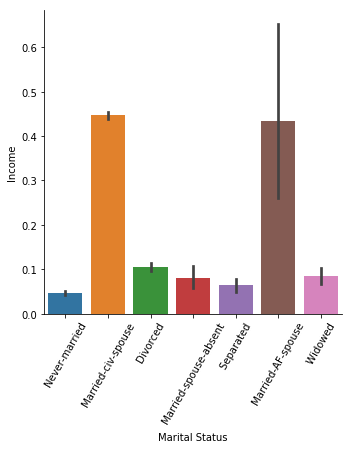

In [15]:
sns.catplot(x='Marital Status', y='Income', height=5, kind='bar', data=train)
plt.xticks(rotation=60)
plt.show()

Counting all Categories in Marital Status.

In [16]:
train['Marital Status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital Status, dtype: int64

Merging Married-AF-spouse category into Married-civ-spouse.

In [17]:
train['Marital Status'].replace('Married-AF-spouse', 'Married-civ-spouse', inplace=True)
test['Marital Status'].replace('Married-AF-spouse', 'Marries-civ-spouse', inplace=True)

Replotting After Merging

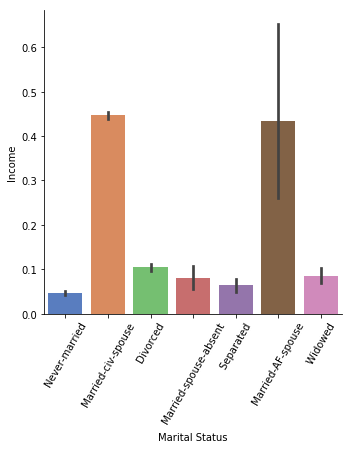

In [18]:
sns.catplot(x='Marital Status', y='Income', height=5, kind='bar', data=train, palette='muted')
plt.xticks(rotation=60)
plt.show()

Filling NA values by 0 in Occupation column.

In [19]:
train['Occupation'].fillna(' 0', inplace=True)
test['Occupation'].fillna(' 0', inplace=True)

plotting Occupation Feature column with Target Value Income

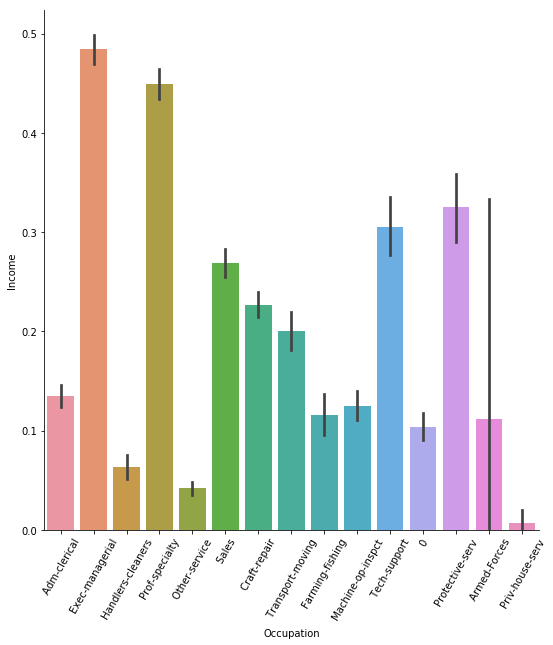

In [20]:
sns.catplot(x='Occupation', y='Income', height=8, kind='bar', data=train)
plt.xticks(rotation=60)
plt.show()

Counting Categories Values of Occupation column

In [21]:
train['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 0                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

As we can see above Armed-Forces has only 9 values so it cannot needed so we are removing that by merging it values with 0.
and also re-plotting.

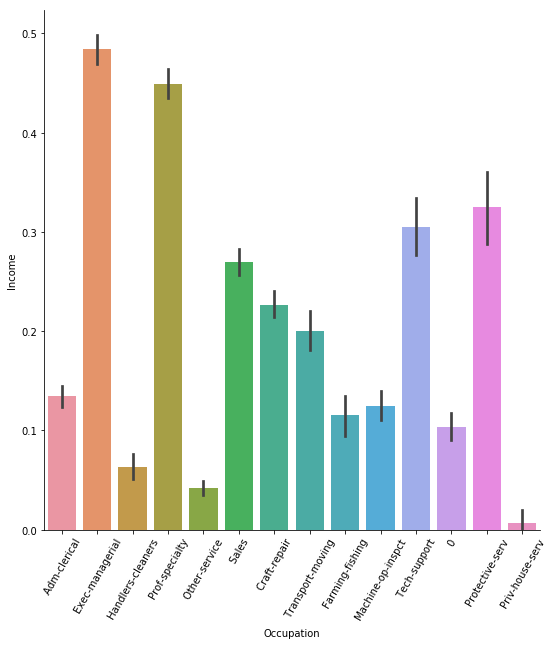

In [22]:
train['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)
test['Occupation'].replace(' Armed-Forces', ' 0', inplace=True)

sns.catplot(x='Occupation', y='Income', height=8, kind='bar', data=train)
plt.xticks(rotation=60)
plt.show()

Plotting Relationship feature column with Target Value Income.

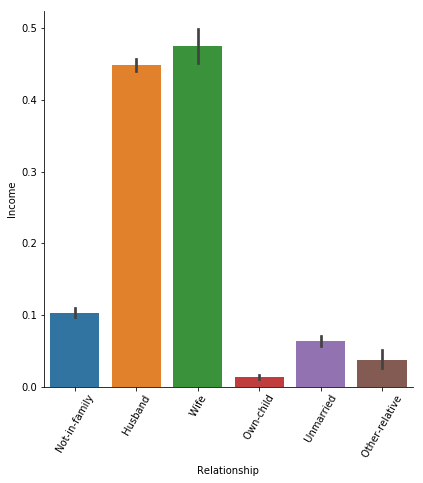

In [23]:
sns.catplot(x='Relationship', y='Income', height=6, kind='bar', data=train)
plt.xticks(rotation=60)
plt.show()

In [24]:
train['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

Plotting Race column with Income

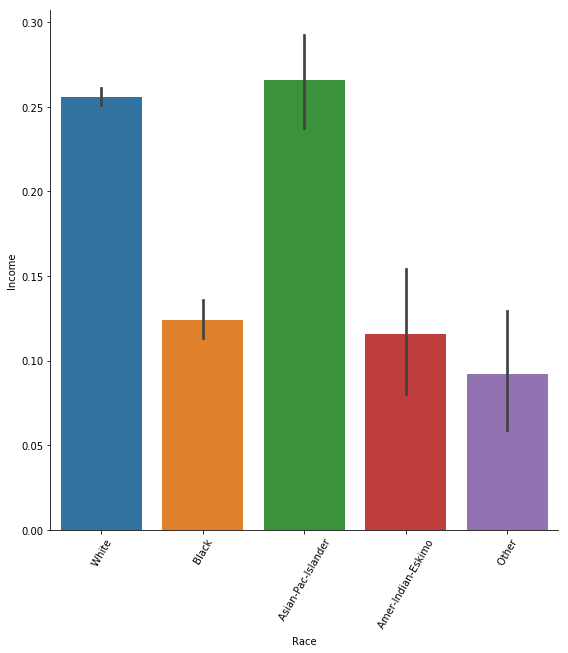

In [25]:
sns.catplot(x='Race', y='Income', height=8, kind='bar', data=train)
plt.xticks(rotation=60)
plt.show()

In [26]:
train['Race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Plotting Sex Column

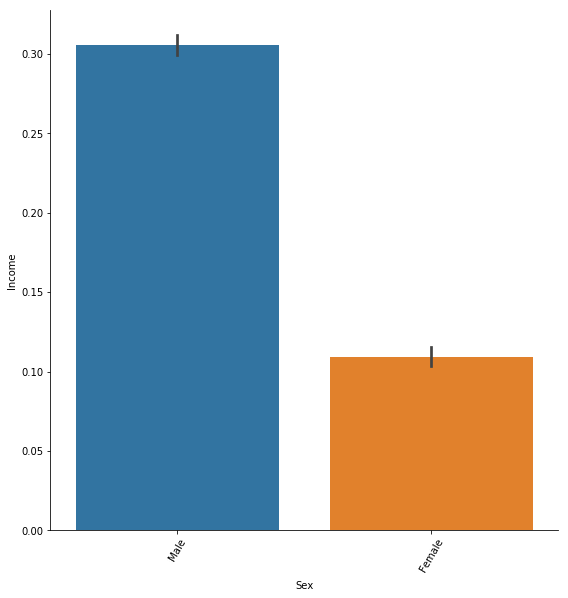

In [27]:
sns.catplot(x='Sex', y='Income', height=8, kind='bar', data=train)
plt.xticks(rotation=60)
plt.show()

Filling NA values in Native Country by 0

In [28]:
train['Native country'].fillna(' 0', inplace=True)
test['Native country'].fillna(' 0', inplace=True)

Plotting Native Country by Target Value Income

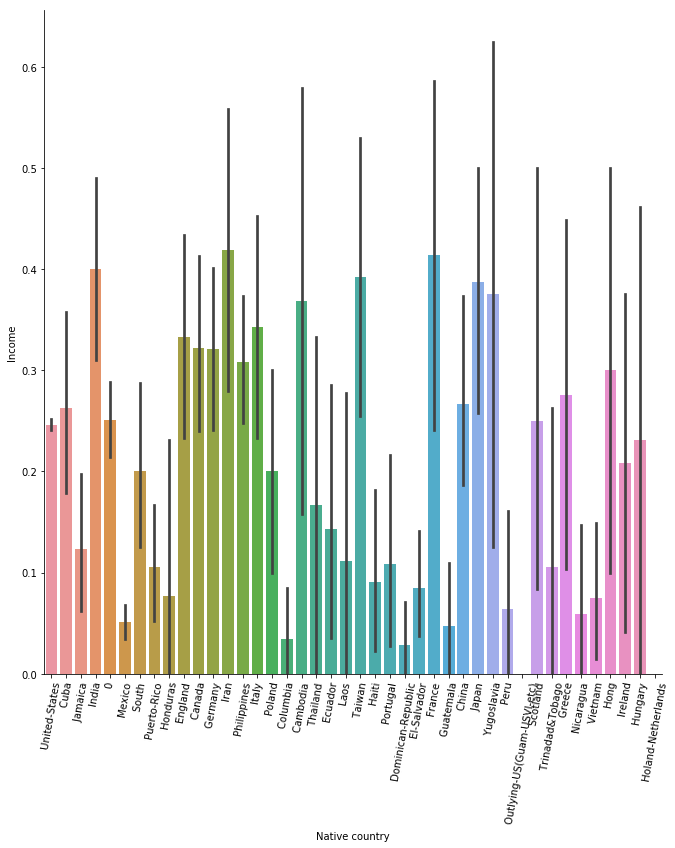

In [29]:
sns.catplot(x='Native country', y='Income', height=10, kind='bar', data=train)
plt.xticks(rotation=80)
plt.show()

As we can see above that Native Country Column has to many countries are there, for reducing the countries we are dividing all countries into regions as shown below and replotting Native Country column.

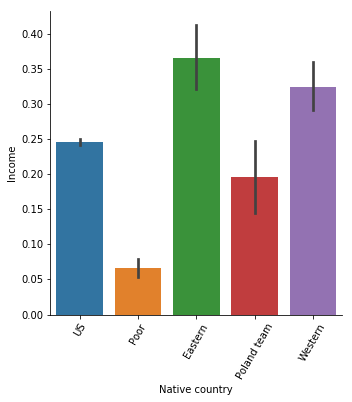

In [30]:
def native(country):
    if country in [' United-States', ' Cuba', ' 0']:
        return 'US'
    elif country in [' England', ' Germany', ' Canada', ' Italy', ' France', ' Greece', ' Philippines']:
        return 'Western'
    elif country in [' Mexico', ' Puerto-Rico', ' Honduras', ' Jamaica', ' Columbia', ' Laos', ' Portugal', ' Haiti',
                     ' Dominican-Republic', ' El-Salvador', ' Guatemala', ' Peru',
                     ' Trinadad&Tobago', ' Outlying-US(Guam-USVI-etc)', ' Nicaragua', ' Vietnam',
                     ' Holand-Netherlands']:
        return 'Poor'  # no offence
    elif country in [' India', ' Iran', ' Cambodia', ' Taiwan', ' Japan', ' Yugoslavia', ' China', ' Hong']:
        return 'Eastern'
    elif country in [' South', ' Poland', ' Ireland', ' Hungary', ' Scotland', ' Thailand', ' Ecuador']:
        return 'Poland team'

    else:
        return country


train['Native country'] = train['Native country'].apply(native)
test['Native country'] = test['Native country'].apply(native)

sns.catplot(x='Native country', y='Income', height=5, kind='bar', data=train)
plt.xticks(rotation=60)
plt.show()

Joint Both train and test dataset

In [31]:
joint = pd.concat([train,test], axis=0)
joint.dtypes

Age                 int64
Workclass          object
fnlgwt            float64
Education          object
Education num       int64
Marital Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital Gain        int64
Capital Loss        int64
Hours/Week          int64
Native country     object
Income              int64
dtype: object

Selecting only object columns from dataset

In [32]:
categorical_features = joint.select_dtypes(include=['object']).axes[1]
for col in categorical_features:
    print (col, joint[col].nunique())

Workclass 9
Education 16
Marital Status 7
Occupation 14
Relationship 6
Race 5
Sex 2
Native country 5


Splitting all Categories of every columns as a single column and splitting by :

In [33]:
for col in categorical_features:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':')], axis=1)
    joint.drop(col, axis=1, inplace=True)

joint.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: 0,Workclass: Federal-gov,Workclass: Local-gov,...,Race: Black,Race: Other,Race: White,Sex: Female,Sex: Male,Native country:Eastern,Native country:Poland team,Native country:Poor,Native country:US,Native country:Western
0,39,11.258253,13,2174,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,11.330348,13,0,0,13,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,12.281398,9,0,0,40,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,53,12.366157,7,0,0,40,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,28,12.732013,13,0,0,40,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


Taking Train and Test data
Xtrain are all feature columns
Ytrain is Target Value
same ofr test data

In [34]:
train = joint.head(train.shape[0])
test = joint.tail(test.shape[0])

Xtrain = train.drop('Income', axis=1)
Ytrain = train['Income']

Xtest = test.drop('Income', axis=1)
Ytest = test['Income']

Creating Logistic Regression from scratch
defining funtions:
Hypothesis using Sigmoid function
Calculating Loss function
Fit
Predict

In [42]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept

    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    #Hypothesis
    def __sigmoid(self, z):
        return 1/(1 + np.exp(-z))

    #Loss Function
    def __loss(self, h, y):
        return (-y * np.log(h) - (1-y) * np.log(1-h)).mean()

    #fitting values
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h-y)) / y.size
            self.theta -= self.lr * gradient

    #Probability of prediction
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)

        return self.__sigmoid(np.dot(X, self.theta))

    #predicting the value
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold


After this we can use Logistic Regression as we were using in Sklearn lib
1. fitting values in model
2. predicting the values
3. Final Accuracy

In [46]:
model = LogisticRegression()
model.fit(Xtrain, Ytrain)

Ztrain = model.predict(Xtrain)
Ztest = model.predict(Xtest)

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


In [47]:
print('Accuracy of the Logistic Regression Model', (Ztrain == Ytrain).mean())

Accuracy of the Logistic Regression Model 0.7764503547188354
